In [42]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns
#data visualization
import matplotlib.pyplot as plt
import seaborn as sns 
#clustering model library
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('/content/sample_data/Dataset_3.csv')
df.head()

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1.0,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,TVS iQube
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1.0,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,TVS iQube
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3.0,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,TVS iQube
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,TVS iQube
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1.0,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,TVS iQube


In [3]:
df.isnull().sum()

review                471
Used it for           445
Owned for             445
Ridden for            570
rating                445
Visual Appeal         477
Reliability           494
Performance           690
Service Experience    495
Extra Features        813
Comfort               516
Maintenance cost      815
Value for Money       636
Model Name            445
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


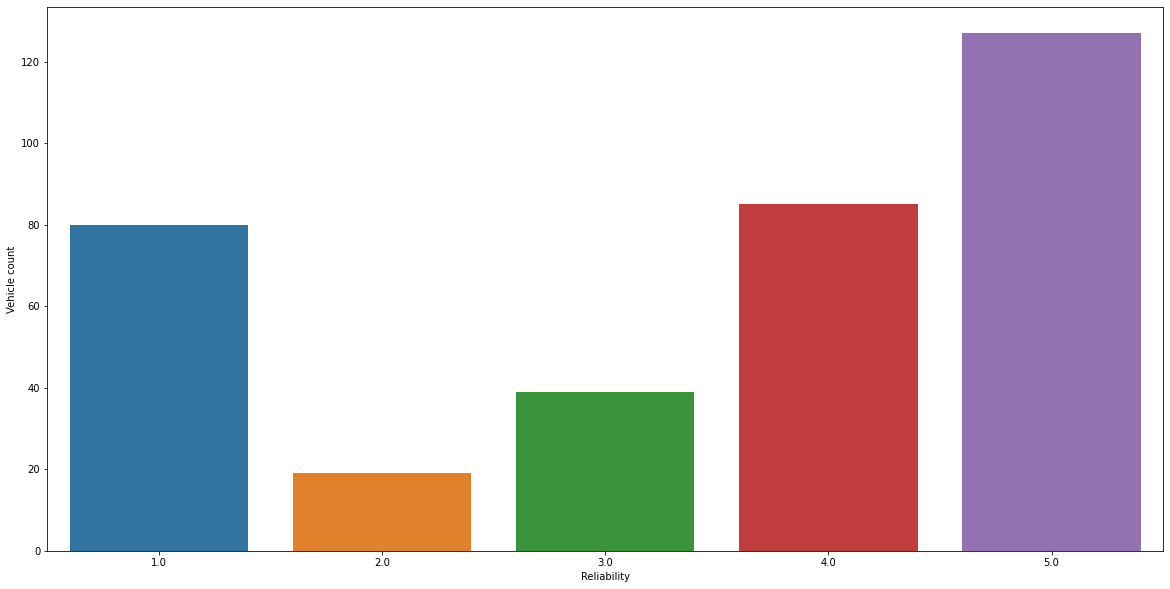

In [6]:
plt.figure(figsize=(20,10))
sns.countplot(df.Reliability)
plt.xlabel("Reliability")
plt.ylabel("Vehicle count")
plt.show()

In [8]:
df.fillna(0)

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,0,1.0,3.0,4.0,0.0,0.0,0.0,4.0,0.0,1.0,TVS iQube
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1.0,3.0,1.0,0.0,1.0,0.0,3.0,0.0,3.0,TVS iQube
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3.0,4.0,4.0,0.0,2.0,0.0,5.0,0.0,2.0,TVS iQube
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,TVS iQube
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1.0,3.0,4.0,0.0,1.0,0.0,3.0,0.0,2.0,TVS iQube
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
840,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
841,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
842,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


                      rating  Visual Appeal  Reliability  Performance  \
rating              1.000000       0.789915     0.901274     0.832130   
Visual Appeal       0.789915       1.000000     0.778445     0.788995   
Reliability         0.901274       0.778445     1.000000     0.826156   
Performance         0.832130       0.788995     0.826156     1.000000   
Service Experience  0.875063       0.744443     0.864326     0.764340   
Extra Features      0.917523       0.753671     0.901168     0.845443   
Comfort             0.829451       0.820448     0.807271     0.810034   
Maintenance cost    0.900439       0.902380     0.892491     0.836988   
Value for Money     0.871744       0.777673     0.820311          NaN   

                    Service Experience  Extra Features   Comfort  \
rating                        0.875063        0.917523  0.829451   
Visual Appeal                 0.744443        0.753671  0.820448   
Reliability                   0.864326        0.901168  0.807271 

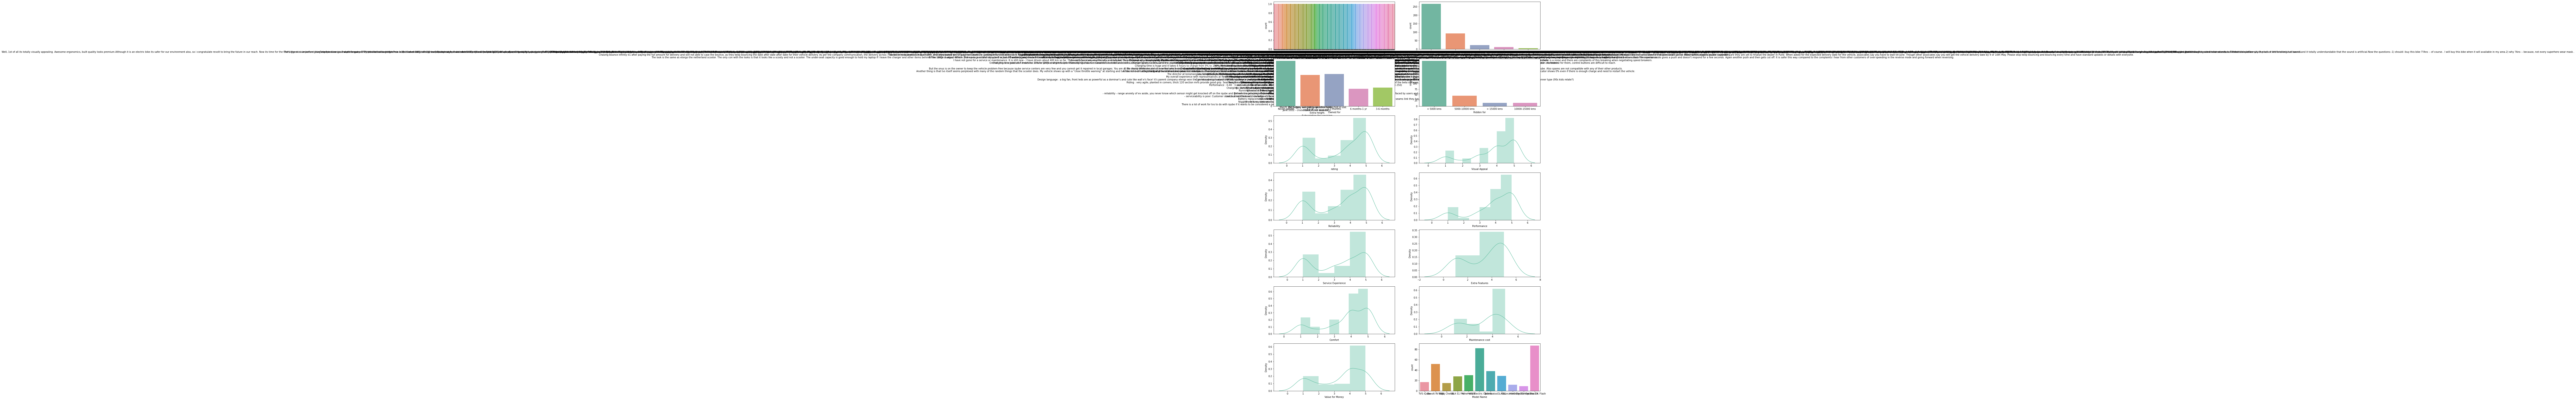

In [9]:
from warnings import filterwarnings

# Suppress warnings
filterwarnings("ignore")

sns.set_palette("Set2")

# Initialize lists to store categorical and continuous variables
cat = []
con = []

# Calculate number of rows needed for subplots
num_rows = int((df.shape[1]+1)/2)

# Set figure size for better visualization
plt.figure(figsize=(20, 30))

# Initialize counter for subplot
x = 1

# Loop through columns in the dataframe
for i in df.columns:
    if df[i].dtypes == "object":
        # Append to categorical variable list
        cat.append(i)
        # Plot countplot for categorical variable
        plt.subplot(num_rows, 2, x)
        x = x + 1
        sns.countplot(df[i])
    else:
        # Append to continuous variable list
        con.append(i)
        # Plot histogram for continuous variable
        plt.subplot(num_rows, 2, x)
        x = x + 1
        sns.distplot(df[i])

# Print correlation matrix
print(df.corr())

# Show the plot
plt.show()

In [10]:
z = df.loc[:,cat].values
z

array([["We all checked the bike's capacity to be 150 km's ( for 1 full charge). now its given only 80 who the hell wants to pay 1 lakh for just 80 km's. We don't need max speed for 70 km. Just 40 km/hr. is more than enough. For better safety. How many accidents need to happen . Worst experience if you expect me to say. Felt cheated.",
        'Daily Commute', 'Never owned', nan, 'TVS iQube'],
       ["Performance is very poor on this bike. The charging problem is a very big thing. Worth money. Don't spend the money on this bike. My bike is standing in the service center of tvs iqube for a long time. I am very disappointed. Nobody can hear me because I purchased this bike. I want to sell this bike as soon as possible.",
        'Everything', '> 1 yr', '< 5000 kms', 'TVS iQube'],
       ["I purchased this in April 2022 and the sales staff was clueless about the new vehicle launch in May 2022. I asked specifically if there is a new model coming but they had no idea.\nThe scooter is well 

In [12]:
pd.set_option('display.max_columns', None)
top_range_1 = df.sort_values(by= 'rating', ascending= False)
print(top_range_1[['Owned for','Reliability','Performance','rating','Model Name']])

         Owned for  Reliability  Performance  rating           Model Name
398         > 1 yr          4.0          NaN     5.0  Hero Electric Flash
120     < 3 months          5.0          5.0     5.0           Ather 450X
122  6 months-1 yr          5.0          5.0     5.0           Ather 450X
123     3-6 months          5.0          5.0     5.0           Ather 450X
124  6 months-1 yr          5.0          5.0     5.0           Ather 450X
..             ...          ...          ...     ...                  ...
839            NaN          NaN          NaN     NaN                  NaN
840            NaN          NaN          NaN     NaN                  NaN
841            NaN          NaN          NaN     NaN                  NaN
842            NaN          NaN          NaN     NaN                  NaN
843            NaN          NaN          NaN     NaN                  NaN

[844 rows x 5 columns]


In [14]:
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [15]:
my_label=preprocessing.LabelEncoder()
df['rating']=my_label.fit_transform(df['rating'])
print(df)

                                                review    Used it for  \
0    We all checked the bike's capacity to be 150 k...  Daily Commute   
1    Performance is very poor on this bike. The cha...     Everything   
2    I purchased this in April 2022 and the sales s...  Daily Commute   
3    If any issues come in scooty parts not availab...  Daily Commute   
4    Don't buy this vehicle unless you have a near ...  Daily Commute   
..                                                 ...            ...   
839                                                NaN            NaN   
840                                                NaN            NaN   
841                                                NaN            NaN   
842                                                NaN            NaN   
843                                                NaN            NaN   

         Owned for      Ridden for  rating  Visual Appeal  Reliability  \
0      Never owned             NaN       0       

In [16]:
one_hot_encoded_data = pd.get_dummies(df, columns = ['Model Name'])
print(one_hot_encoded_data)

                                                review    Used it for  \
0    We all checked the bike's capacity to be 150 k...  Daily Commute   
1    Performance is very poor on this bike. The cha...     Everything   
2    I purchased this in April 2022 and the sales s...  Daily Commute   
3    If any issues come in scooty parts not availab...  Daily Commute   
4    Don't buy this vehicle unless you have a near ...  Daily Commute   
..                                                 ...            ...   
839                                                NaN            NaN   
840                                                NaN            NaN   
841                                                NaN            NaN   
842                                                NaN            NaN   
843                                                NaN            NaN   

         Owned for      Ridden for  rating  Visual Appeal  Reliability  \
0      Never owned             NaN       0       

In [20]:
df.dropna(axis=0, inplace=True)